In [1]:
%load_ext autoreload
%autoreload 2

import sys
import os
import time

import numpy as np
try:
    import mxnet as mx
except:
    sys.stderr.write("Cannot import mxnet.\n")
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.exposure import rescale_intensity
from skimage.transform import rotate

sys.path.append(os.environ['REPO_DIR'] + '/utilities')
from utilities2015 import *
from metadata import *
from data_manager import *
from learning_utilities import *
from distributed_utilities import *
from visualization_utilities import *

/home/yuncong/MouseBrainAtlas/src/utilities/utilities2015.py:2: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/usr/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python2.7/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/usr/local/lib/python2.7

Setting environment for Precision WorkStation
{}


No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to load operation ini.
File does not exist: /media/yuncong/BstemAtlasData/atlas_data/CSHL_data_processed/DEMO998/DEMO998_sorted_filenames.txt
/home/yuncong/MouseBrainAtlas/src/utilities/data_manager.py:5501: DeprecationWarning: BaseException.message has been deprecated as of Python 2.6
  sys.stderr.write("Failed to cache %s sections_to_filenames: %s\n" % (stack, e.message))
Failed to cache DEMO998 sections_to_filenames: 
File does not exist: /media/yuncong/BstemAtlasData/atlas_data/CSHL_data_processed/DEMO998/DEMO998_sorted_filenames.txt
/home/yuncong/MouseBrainAtlas/src/utilities/data_manager.py:5512: DeprecationWarning: BaseException.message has been deprecated as of Python 2.6
  sys.stderr.write("Failed to cache %s filenames_to_sections: %s\n" % (stack, e.message))
Failed to cache DEMO998 filenames_to_sections: 
No anchor.txt is found. Seems we are using the operation ini to provide anchor. Try to lo

In [3]:
BRAINS_INFO_DIR

'/media/yuncong/BstemAtlasData/atlas_data/brains_info'

In [4]:
if os.path.exists(BRAINS_INFO_DIR):
    for brain_ini in os.listdir(BRAINS_INFO_DIR):
        brain_name = os.path.splitext(brain_ini)[0]
        brain_info = load_ini(os.path.join(BRAINS_INFO_DIR, brain_ini))
        planar_resolution[brain_name] = float(brain_info['planar_resolution_um'])

In [2]:
from sklearn.externals import joblib

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import GradientBoostingClassifier 

sys.path.append('/home/yuncong/csd395/xgboost/python-package')
try:
    from xgboost.sklearn import XGBClassifier
except:
    sys.stderr.write('xgboost is not loaded.')

In [3]:
batch_size = 256
model_dir_name = 'inception-bn-blue'
model_name = 'inception-bn-blue'
model, mean_img = load_mxnet_model(model_dir_name=model_dir_name, model_name=model_name, 
                                   num_gpus=1, batch_size=batch_size)

ENABLE_DOWNLOAD_S3 is False. Skip downloading from S3.
/usr/local/lib/python2.7/dist-packages/mxnet/module/base_module.py:53: UserWarning: You created Module with Module(..., label_names=['softmax_label']) but input with name 'softmax_label' is not found in symbol.list_arguments(). Did you mean one of:
	data
  warnings.warn(msg)
/usr/local/lib/python2.7/dist-packages/mxnet/module/base_module.py:65: UserWarning: Data provided by label_shapes don't match names specified by label_names ([] vs. ['softmax_label'])
  warnings.warn(msg)


In [4]:
train_stacks = ['MD589', 'MD585']
test_stacks = ['MD594']

In [5]:
stack_stain = {'MD585': 'N', 'MD589': 'N', 'MD594': 'N'}

# Number of sections on which to sample examples from.
stack_section_number = defaultdict(dict)

for name_u in all_known_structures:
    for st in train_stacks:
        stack_section_number[st][name_u] = 10
#         if name_u == '4N' or name_u == '10N':
#             stack_section_number[st][name_u] = 20
#         else:
#             stack_section_number[st][name_u] = 10
    for st in test_stacks:
        stack_section_number[st][name_u] = 10

stack_section_number.default_factory = None

In [6]:
windowing_settings

{1: {'patch_size': 224, 'spacing': 56},
 2: {'comment': 'larger margin', 'patch_size': 224, 'spacing': 56},
 3: {'comment': 'smaller spacing', 'patch_size': 224, 'spacing': 32},
 4: {'comment': 'smaller spacing', 'patch_size': 224, 'spacing': 128},
 5: {'comment': 'smaller spacing', 'patch_size': 224, 'spacing': 64},
 6: {'comment': 'twice as large patch', 'patch_size': 448, 'spacing': 64},
 7: {'comment': 'specify size/spacing in terms of microns rather than pixels',
  'patch_size_um': 103.04,
  'spacing_um': 30},
 8: {'comment': 'larger patch', 'patch_size_um': 206.08, 'spacing_um': 30},
 9: {'comment': 'larger patch', 'patch_size_um': 412.16, 'spacing_um': 30},
 10: {'comment': 'larger patch', 'patch_size_um': 824.32, 'spacing_um': 30},
 11: {'comment': 'larger patch', 'patch_size_um': 51.52, 'spacing_um': 30},
 12: {'comment': 'larger patch', 'patch_size_um': 25.76, 'spacing_um': 30}}

In [7]:
# win_id = 7
# win_id = 8
# win_id = 9
# win_id = 11
win_id = 8

In [8]:
grid_indices_lookup_allStacks = {}

for stack in train_stacks + test_stacks:
#     try:
#         grid_indices_lookup_allStacks[stack] = \
#         DataManager.load_annotation_to_grid_indices_lookup(stack=stack, win_id=win_id,
#                                                            by_human=False, timestamp='latest',
#                                                            detector_id_f=1,
#                                                           return_locations=True)            

#         grid_indices_lookup_allStacks[stack] = \
#         DataManager.load_annotation_to_grid_indices_lookup(stack=stack, win_id=win_id,
#                                                            by_human=True, timestamp='latest',
#                                                           return_locations=True, suffix='structures')            

    grid_indices_lookup_allStacks[stack] = \
    DataManager.load_annotation_to_grid_indices_lookup(stack=stack, win_id=win_id,
                                                       by_human=True, timestamp='latest',
                                                      return_locations=True)

#     except Exception as e:
#         sys.stderr.write("Fail to load annotation grid lookup for %s: %s\n" % (stack, e.message))
#         raise e

ENABLE_DOWNLOAD_S3 is False. Skip downloading from S3.


OSError: [Errno 2] No such file or directory: '/home/yuncong/MouseBrainAtlas/demo/demo_data/CSHL_labelings_v3/MD589'

In [8]:
from itertools import chain
all_labels = sorted(list(set(chain.from_iterable(set(grid_indices_lookup_allStacks[st].columns.tolist()) 
                                                 for st in train_stacks + test_stacks))))

In [9]:
def sample_addresses(stacks, structure):
        
    positive_labels = [structure]
    negative_labels = get_negative_labels(structure, 'neg_has_all_surround', 
                                          margin='500um', labels_found=all_labels)

    positive_addresses_all_stacks = {}
    negative_addresses_all_stacks = {}
        
    for stack in stacks:

        candidate_sections = list(chain(*[grid_indices_lookup_allStacks[stack][pl].dropna(how='any').index.tolist() 
                                      for pl in positive_labels]))

        n_sections = stack_section_number[stack][structure]

        if stack_stain[stack] == 'F':
            neurotrace_sections = []
            nissl_sections = []
            for sec in candidate_sections:
                if (metadata_cache['sections_to_filenames'][stack][sec].split('-')[1][0] == 'F') \
                or stack in ['CHATM2', 'CHATM3']:
                    neurotrace_sections.append(sec)
                else:
                    nissl_sections.append(sec)
            print 'neurotrace_sections', neurotrace_sections
            print 'nissl_sections', nissl_sections
            sampled_sections = np.random.choice(neurotrace_sections, min(len(neurotrace_sections), n_sections), replace=False)
        else:
            sampled_sections = np.random.choice(candidate_sections, min(len(candidate_sections), n_sections), replace=False)
            
        positive_addresses_all_stacks[stack] = sorted([(stack, sec, tuple(loc))
for nl in set(positive_labels) & set(grid_indices_lookup_allStacks[stack].columns)
  for sec, locs in grid_indices_lookup_allStacks[stack][nl].loc[sampled_sections].dropna().iteritems()
  for loc in locs])

        negative_addresses_all_stacks[stack] = sorted([(stack, sec, tuple(loc))
for nl in set(negative_labels) & set(grid_indices_lookup_allStacks[stack].columns)
  for sec, locs in grid_indices_lookup_allStacks[stack][nl].loc[sampled_sections].dropna().iteritems()
  for loc in locs])

    positive_addresses = sum(positive_addresses_all_stacks.values(), [])
    negative_addresses = sum(negative_addresses_all_stacks.values(), [])

    del positive_addresses_all_stacks, negative_addresses_all_stacks

    return positive_addresses, negative_addresses

In [10]:
# train_scheme = 'stretch_min_max'
# train_scheme = 'normalize_mu_sigma_global_(-1,5)'
# train_scheme = 'normalize_mu_region_sigma_wholeImage_(-1,5)'
# train_scheme = 'normalize_mu_region_sigma_wholeImage_(-1,9)'
train_scheme = 'none'

# test_scheme = 'stretch_min_max'
# test_scheme = 'normalize_mu_sigma_global_(-1,5)'
# test_scheme = 'normalize_mu_region_sigma_wholeImage_(-1,5)'
# test_scheme = 'normalize_mu_region_sigma_wholeImage_(-1,9)'
test_scheme = 'none'

In [11]:
# existing_classifier_id = 998 # If set, not train from scratch
# existing_classifier_id = 990
# extract_train_features = True

In [12]:
existing_classifier_id = None
extract_train_features = True
# classifier_id = 990 # MD585/MD589 -> MD594, cnn
# classifier_id = 991 # MD585/MD589 -> MD594, lbp
# classifier_id = 992 # MD585/MD589 -> MD594, glcm
# classifier_id = 993 # MD585/MD589 -> MD594, mean greylevel
# classifier_id = 899 # CHATM2 -> CHATM2, cnn
# classifier_id = 898 # DEMO998 -> DEMO998, cnn, win7
# classifier_id = 897 # DEMO998 -> DEMO998, cnn, win8
# classifier_id = 896 # DEMO998 -> DEMO998, cnn, win9
# win10 is too large and no patch can be extracted from DEMO998 section 225 3N.
classifier_id = 895 # DEMO998 -> DEMO998, cnn, win11

In [13]:
# method = 'mean_intensity'
method = 'cnn'

In [14]:
prep_id = 'alignedBrainstemCrop'

neurotrace_sections [225]
nissl_sections []
# positive train = 93
# negative train = 1482
('DEMO998', 225)
neurotrace_sections [225]
nissl_sections []
# positive test = 93
# negative test = 1482
('DEMO998', 225)
n_train 1000
Trial 0
Training: 93 positive, 93 negative
Test: 93 positive, 1000 negative


Fitting classifier: 0.02 seconds


Trial 1
Training: 93 positive, 93 negative
Test: 93 positive, 1000 negative


Fitting classifier: 0.02 seconds


Trial 2
Training: 93 positive, 93 negative
Test: 93 positive, 1000 negative


Fitting classifier: 0.02 seconds


n_train 5000
Trial 0
Training: 93 positive, 93 negative
Test: 93 positive, 1000 negative


Fitting classifier: 0.02 seconds


Trial 1
Training: 93 positive, 93 negative
Test: 93 positive, 1000 negative


Fitting classifier: 0.02 seconds


Trial 2
Training: 93 positive, 93 negative
Test: 93 positive, 1000 negative


Fitting classifier: 0.02 seconds


n_train 15000
Trial 0
Training: 93 positive, 93 negative
Test: 93 positive, 1000 negative


Fitting classifier: 0.02 seconds


Trial 1
Training: 93 positive, 93 negative
Test: 93 positive, 1000 negative


Fitting classifier: 0.02 seconds


Trial 2
Training: 93 positive, 93 negative
Test: 93 positive, 1000 negative


Fitting classifier: 0.02 seconds


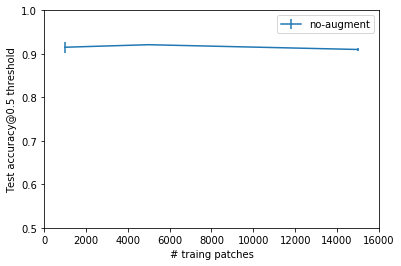

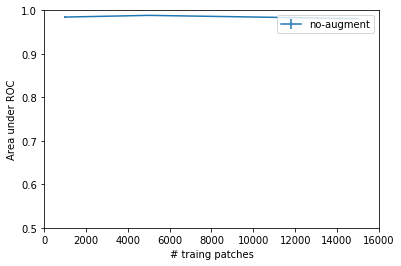

No handlers could be found for logger "matplotlib.legend"


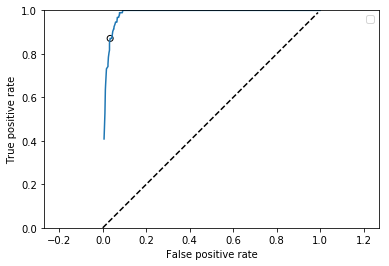

In [15]:
# for structure in all_known_structures:
for structure in ['3N']:

    # features_dict = {(scheme, tfv): {} for scheme in schemes for tfv in transforms}
    features_dict = defaultdict(dict)

    ############## Sample and Load training feature vectors #########################################

    if extract_train_features:
    
        positive_addresses_traindata, negative_addresses_traindata = \
        sample_addresses(train_stacks, structure)

        print '# positive train =', len(positive_addresses_traindata)
        print '# negative train =', len(negative_addresses_traindata)

        addresses_to_compute = positive_addresses_traindata + negative_addresses_traindata

        for variant in [0]:
            features_loaded = read_features(addresses=addresses_to_compute, 
                                            scheme=train_scheme, win_id=win_id, prep_id=prep_id, 
                                            model=model, mean_img=mean_img, model_name=model_name, 
                                            batch_size=batch_size,
                                           method=method,
                                           compute_new_addresses=True
#                                            compute_new_addresses=False
                                           )
            
            for addr, f in izip(addresses_to_compute, features_loaded):
                if f is not None:
                    features_dict[(train_scheme, variant)][addr] = f

            del features_loaded

    ############## Sample and Load test feature vectors #############################################
    
    positive_addresses_testdata, negative_addresses_testdata = \
    sample_addresses(test_stacks, structure)
    
    print '# positive test =', len(positive_addresses_testdata)
    print '# negative test =', len(negative_addresses_testdata)
    
    addresses_to_compute = positive_addresses_testdata + negative_addresses_testdata

    for variant in [0]:
        features_loaded = read_features(addresses=addresses_to_compute, 
                                        scheme=test_scheme, win_id=win_id, prep_id=prep_id, 
                                        model=model, mean_img=mean_img, model_name=model_name, 
                                        batch_size=batch_size,
                                           method=method,
                                       compute_new_addresses=True
#                                         compute_new_addresses=False
                                       )

        for addr, f in izip(addresses_to_compute, features_loaded):
            if f is not None:
                features_dict[(test_scheme, variant)][addr] = f

        del features_loaded
            
    ########################################################################################
    
    # n_train_list = [10, 100, 200, 500, 1000, 2000, 5000, 10000, 15000]
#     n_train_list = [10, 1000]
    n_train_list = [1000, 5000, 15000]
#     n_train_list = [1000, 5000]
#     n_train_list = [15000]
    test_metrics_all_ntrain = defaultdict(lambda: defaultdict(list))
    train_metrics_all_ntrain = defaultdict(lambda: defaultdict(list))

    for n_train in n_train_list:

        print "n_train", n_train
        
        for trial in range(3):
            print "Trial", trial
            
            ##### Sample from training pool the required number of examples ######

            # If train and test data are from different sets
            n_train_pos = min(n_train, len(positive_addresses_traindata))
#             if len(positive_addresses_traindata) < n_train_pos:
#                 continue
            training_pos_indices = np.random.choice(range(len(positive_addresses_traindata)), n_train_pos, replace=False)
            
            n_test_pos = min(len(positive_addresses_testdata), 1000)
            test_pos_indices = np.random.choice(range(len(positive_addresses_testdata)), n_test_pos, replace=False)

            # If train and test are from same set
        #     n_pos_total = len(positive_addresses)
        #     n_train_pos = 1000
        #     training_pos_indices = np.random.choice(range(n_pos_total), n_train_pos, replace=False)
        #     test_pos_indices = np.random.choice(np.setdiff1d(range(n_pos_total), training_pos_indices),
        #                                         size=min(2000, n_pos_total-n_train_pos), replace=False)
        #     n_test_pos = len(test_pos_indices)

            # If train and test data are from different sets
            n_train_neg = n_train_pos
            training_neg_indices = np.random.choice(range(len(negative_addresses_traindata)), n_train_neg, replace=False)
            
            n_test_neg = min(len(negative_addresses_testdata), 1000)
            test_neg_indices = np.random.choice(range(len(negative_addresses_testdata)), n_test_neg, replace=False)

            # If train and test are from same set
        #     n_neg_total = len(negative_addresses)
        #     n_train_neg = 1000
        #     training_neg_indices = np.random.choice(range(n_neg_total), n_train_neg, replace=False)
        #     test_neg_indices = np.random.choice(np.setdiff1d(range(n_neg_total), training_neg_indices), 
        #                                         size=min(2000, n_pos_total-n_train_pos), replace=False)
        #     n_test_neg = len(test_neg_indices)

            print "Training: %d positive, %d negative" % (n_train_pos, n_train_neg)
            print "Test: %d positive, %d negative" % (n_test_pos, n_test_neg)

            ################

            if extract_train_features:
                # If train and test data are from different sets
                addresses_train_pos = [positive_addresses_traindata[i] for i in training_pos_indices]
                addresses_train_neg = [negative_addresses_traindata[i] for i in training_neg_indices]

            addresses_test_pos = [positive_addresses_testdata[i] for i in test_pos_indices]
            addresses_test_neg = [negative_addresses_testdata[i] for i in test_neg_indices]

            #################

#             for augment_training in [True, False]:
            for augment_training in [False]:
        
                feature_classifier_alg = 'lr'
#                 feature_classifier_alg = 'xgb2'
        #             feature_classifier_alg = 'lin_svc'
        #             feature_classifier_alg = 'lin_svc_calib'
                sample_weights = None   

                if extract_train_features:
            
                    if augment_training:
                        train_transforms = range(8)
                    else:
                        train_transforms = range(1)
                    features_train_pos = {(train_scheme, tf_variant): 
                                          [features_dict[(train_scheme, tf_variant)][addr] 
                                           for addr in addresses_train_pos 
                                           if addr in features_dict[(train_scheme, tf_variant)]]
                                              for tf_variant in train_transforms}
                    features_train_neg = {(train_scheme, tf_variant): 
                                          [features_dict[(train_scheme, tf_variant)][addr] 
                                           for addr in addresses_train_neg
                                           if addr in features_dict[(train_scheme, tf_variant)]]
                                              for tf_variant in train_transforms}

                    train_data = np.concatenate([np.r_[features_train_pos[(train_scheme,tf)], 
                                                       features_train_neg[(train_scheme,tf)]] 
                                                    for tf in train_transforms])
                    train_labels = np.concatenate([np.r_[np.ones((len(features_train_pos[(train_scheme,tf)]), )), 
                                                        -np.ones((len(features_train_neg[(train_scheme,tf)]), ))]
                                                  for tf in train_transforms])

                if existing_classifier_id is None:
                    clf = train_binary_classifier(train_data, train_labels,
                                       alg=feature_classifier_alg, 
                                       sample_weights=sample_weights)

    #                 del train_data, features_train_pos, features_train_neg

                    clf_fp = DataManager.get_classifier_filepath(classifier_id=classifier_id, structure=structure)
                    save_data(clf, clf_fp)
#                     upload_to_s3(clf_fp)
                else:
                    sys.stderr.write('Load existing classifiers %d\n' % existing_classifier_id)
                    clf = DataManager.load_classifiers(classifier_id=existing_classifier_id)[structure]
                
                ######################### Compute train metrics #########################
                
                if extract_train_features:
                    train_metrics = compute_classification_metrics(clf.predict_proba(train_data)[:,1], train_labels)
                    train_metrics_all_ntrain[n_train][(train_scheme, 'augment' if augment_training else 'no-augment')].append(train_metrics)
                
                ######################### Test ###############################
                
                test_transforms = range(1)
                features_test_pos = {(test_scheme, tf_variant): 
                                      [features_dict[(test_scheme, tf_variant)][addr] 
                                       for addr in addresses_test_pos
                                      if addr in features_dict[(test_scheme, tf_variant)]]
                                          for tf_variant in test_transforms}
                features_test_neg = {(test_scheme, tf_variant): 
                                      [features_dict[(test_scheme, tf_variant)][addr] 
                                       for addr in addresses_test_neg
                                      if addr in features_dict[(test_scheme, tf_variant)]]
                                          for tf_variant in test_transforms}
                
                test_data = np.concatenate([np.r_[features_test_pos[(test_scheme,tf_variant)], 
                                  features_test_neg[(test_scheme,tf_variant)]]
                                            for tf_variant in train_transforms])
                test_labels = np.concatenate([np.r_[np.ones((len(features_test_pos[(test_scheme,tf_variant)]), )), 
                                     -np.ones((len(features_test_neg[(test_scheme,tf_variant)]), ))]
                                            for tf_variant in train_transforms])
                test_metrics = compute_classification_metrics(clf.predict_proba(test_data)[:,1], test_labels)
    #             print "acc@0.5 = %.3f, acc@opt = %.3f, opt_thresh = %.3f, auroc = %.3f, auprc = %.3f" % \
    #             (test_metrics['acc'][0.5], test_metrics['acc'][test_metrics['opt_thresh']], test_metrics['opt_thresh'], test_metrics['auroc'], test_metrics['auprc'])

                test_metrics_all_ntrain[n_train][(test_scheme, 'augment' if augment_training else 'no-augment')].append(test_metrics)

    train_metrics_all_ntrain.default_factory = None
    test_metrics_all_ntrain.default_factory = None
    
    plot_result_wrt_ntrain(extract_one_metric(test_metrics_all_ntrain, 'acc', 0.5), ylabel='Test accuracy@0.5 threshold');
    plot_result_wrt_ntrain(extract_one_metric(test_metrics_all_ntrain, 'auroc'), ylabel='Area under ROC');

    plot_roc_curve(test_metrics_all_ntrain[1000][(test_scheme,
                  'no-augment')][0]['fp'], 
                   test_metrics_all_ntrain[1000][(test_scheme,
                  'no-augment')][0]['tp'], 
                  test_metrics_all_ntrain[1000][(test_scheme,
                  'no-augment')][0]['opt_thresh']);
    
    import uuid

    result = {
        'n_sections': stack_section_number,
        'stain': stack_stain,
        'train_stacks': train_stacks,
        'test_stacks': test_stacks,
        'test_scheme': test_scheme,
        'train_scheme': train_scheme,
        'train_metrics_all_ntrain': train_metrics_all_ntrain,
        'test_metrics_all_ntrain': test_metrics_all_ntrain,
        'structure': structure,
        'method': method,
        'classifier_id': existing_classifier_id if existing_classifier_id is not None else classifier_id
    }

#     create_if_not_exists(ROOT_DIR + '/assessment_results_v3/')
#     save_pickle(result, ROOT_DIR + '/assessment_results_v3/assessment_result_%s.pkl' % str(uuid.uuid1()).split('-')[0])

In [16]:
np.mean(extract_one_metric(test_metrics_all_ntrain, 'auroc')[15000][('none','no-augment')])

0.9809193548387096

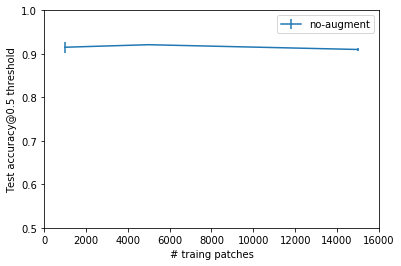

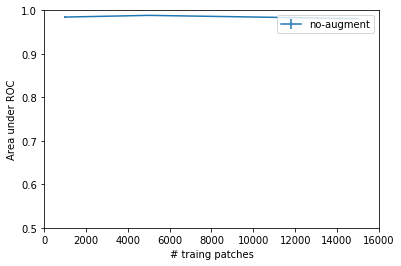

In [17]:
plot_result_wrt_ntrain(extract_one_metric(test_metrics_all_ntrain, 'acc', 0.5), ylabel='Test accuracy@0.5 threshold');
plot_result_wrt_ntrain(extract_one_metric(test_metrics_all_ntrain, 'auroc'), ylabel='Area under ROC');